# CNN을 활용한 Fashion MNIST 

In [1]:
import tensorflow as tf
import numpy as np

#### 데이터셋 불러오기와 정규화 

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0

#### 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
* Conv2D 레이어에서는 채널을 가진 형태가 필요하기 때문에 reshape 로 마지막에 흑백 이미지를 의미하는 1채널을 추가한다. 

In [8]:
# 형태 확인하기 
print(train_X.shape, test_X.shape)  # 2차원 데이터 

# 3차원으로 변형 
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# 형태 확인하기 
print(train_X.shape, test_X.shape)  # 3차원 데이터 

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


#### 데이터 확인 
* Fashion-MNIST 데이터셋에는 __10개의 카테고리__
    * 0 티셔츠/탑 1 바지 2 풀오버(스웨터의 일종) 3 드레스 4 코트 5 샌들 6 셔츠 7 스니커즈 8 가방 9 앵클 부츠

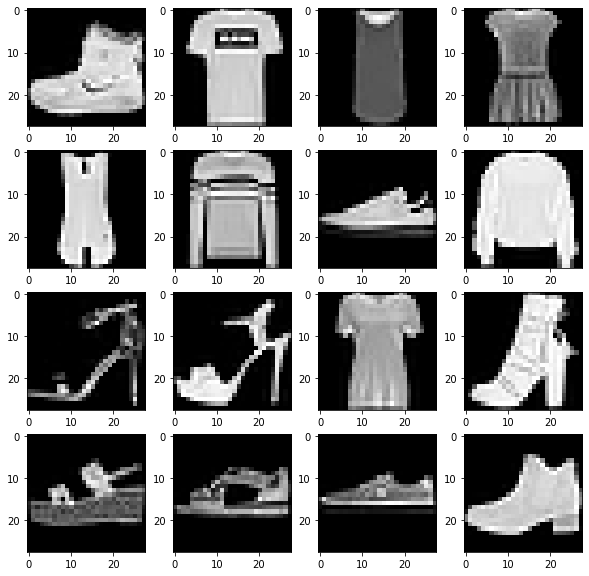

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [12]:
import matplotlib.pyplot as plt

# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))

for c in range(16):
    # 4행 4열로 지정한 grid 에서 c+1 번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28, 28), cmap='gray')  # 그래프를 그리기 위해서는 다시 2차원으로 변환 
    
plt.show()

# 각 라벨 확인하기 
print(train_Y[:16])

#### Fashion MNIST 분류 컨볼루션 신경망 모델 정의

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=16, input_shape=(28, 28, 1)), 
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32), 
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

#### 모델 컴파일
* __sparse_categorical_crossentropy__ : 기존의 원-핫-인코딩으로 처리해야하는 전처리 없이 희소 행렬을 나타내는 데이터를 정답 행렬로 변환해서 처리한다. 따라서 기존에 정답 데이터에 대해 to_categorical() 함수를 처리하지 않아도 된다.
* __Adam()__ : lr을 설정하지 않으면 기본 값인 lr=0.001로 설정된다.

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fashion MNIST 분류 컨볼루션 신경망 모델 학습

In [20]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 12s 275us/sample - loss: 0.4763 - accuracy: 0.8333 - val_loss: 0.3897 - val_accuracy: 0.8575
Epoch 2/25
45000/45000 [==============================] - 10s 212us/sample - loss: 0.3432 - accuracy: 0.8747 - val_loss: 0.3591 - val_accuracy: 0.8683
Epoch 3/25
45000/45000 [==============================] - 10s 212us/sample - loss: 0.2906 - accuracy: 0.8915 - val_loss: 0.3633 - val_accuracy: 0.8747
Epoch 4/25
45000/45000 [==============================] - 10s 214us/sample - loss: 0.2513 - accuracy: 0.9066 - val_loss: 0.3859 - val_accuracy: 0.8711
Epoch 5/25
45000/45000 [==============================] - 10s 213us/sample - loss: 0.2183 - accuracy: 0.9206 - val_loss: 0.4266 - val_accuracy: 0.8703
Epoch 6/25
45000/45000 [==============================] - 10s 212us/sample - loss: 0.1892 - accuracy: 0.9313 - val_loss: 0.4607 - val_accuracy: 0.8734
Epoch 7/25
45000/45000 [====================

#### 모델 평가 

In [21]:
model.evaluate(test_X, test_Y)

10000/10000 [==============================] - 1s 96us/sample - loss: 1.3049 - accuracy: 0.8555


[1.30493808555454, 0.8555]

#### 모델에 대해 그래프로 확인하기 

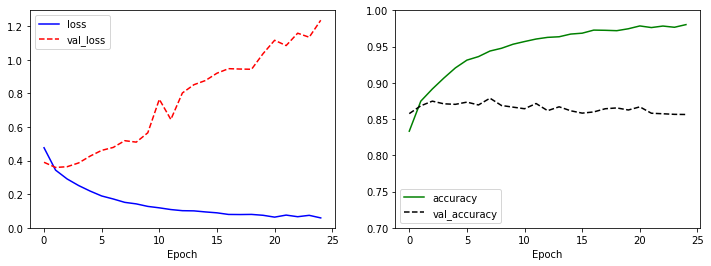

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

#### 모델 개선하기 

In [28]:
tf.keras.backend.clear_session()  # 세션 지우기 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32, input_shape=(28, 28, 1)), 
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64), 
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [29]:
#### 컴파일하고 학습하기 
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 6s 131us/sample - loss: 0.5252 - accuracy: 0.8098 - val_loss: 0.3652 - val_accuracy: 0.8641
Epoch 2/25
45000/45000 [==============================] - 5s 113us/sample - loss: 0.3580 - accuracy: 0.8719 - val_loss: 0.3336 - val_accuracy: 0.8807
Epoch 3/25
45000/45000 [==============================] - 5s 113us/sample - loss: 0.3152 - accuracy: 0.8853 - val_loss: 0.3235 - val_accuracy: 0.8771
Epoch 4/25
45000/45000 [==============================] - 5s 111us/sample - loss: 0.2895 - accuracy: 0.8943 - val_loss: 0.2995 - val_accuracy: 0.8929
Epoch 5/25
45000/45000 [==============================] - 5s 112us/sample - loss: 0.2658 - accuracy: 0.9024 - val_loss: 0.3161 - val_accuracy: 0.8888
Epoch 6/25
45000/45000 [==============================] - 5s 110us/sample - loss: 0.2463 - accuracy: 0.9091 - val_loss: 0.3142 - val_accuracy: 0.8934
Epoch 7/25
45000/45000 [==========================

#### 수정된 모델에 대해 그래프로 확인하기

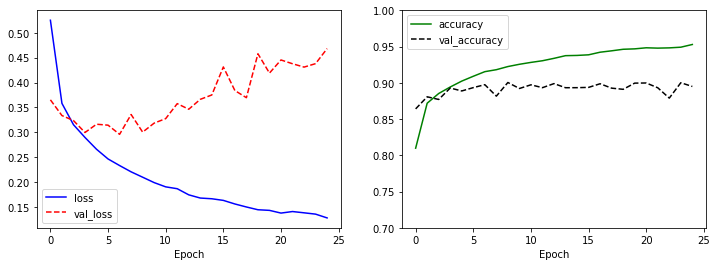

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

In [31]:
model.evaluate(test_X, test_Y)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.4818 - accuracy: 0.8920


[0.48176397508382796, 0.892]

#### 평가 
* val_loss는 계속 증가하지만 val_accuracy는 일정 수준에 이르고 있음
* 테스트 데이터에 대한 분류는 85.5% --> 89.2% 가 나와 조금 향상된 상태임 
* 폴링과 드롭아웃 레이어를 사용하지 않은 경우보다 사용함으로써 성능이 향상됨